In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_24'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [3]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [4]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [6]:
df_gross

,id,dateTime,Tamb,TtopTestTankHPCir,TbottomTestTankHpCir,TtopSourceTank,TloadTankMix,TTopTestTankLoadCir,TloadMix,TbottomSourceTank,...,timeStamp_Temp,timeStamp_watt,entropy_kJ/K,entropy_kJ,nStratCharging,TotalTanksEnergyForAvailability_kJ,DisEntropy_kj/K,DisEntropy_kj,nStratDischarge,DisTotalTanksEnergyForAvailability_kJ
0,535,2021-05-24 08:35:20,21.8120,25.0916,22.0486,21.7782,21.2038,25.3284,22.8936,19.9201,...,0.000556,0.000556,54.609485,1162.267397,-10007.688322,39752.156577,23.734946,521.978391,-34.152532,79769.781970
1,539,2021-05-24 08:35:26,21.8120,25.0578,22.0486,21.7782,21.2038,25.3284,22.8598,19.9539,...,0.001667,0.001667,52.149701,1118.608194,-5109.035500,39810.968785,36.880383,795.742461,-17.660589,79740.380938
2,542,2021-05-24 08:35:31,21.7782,25.0578,22.0486,21.8120,21.2714,25.3284,22.8936,19.9201,...,0.001389,0.001389,55.282852,1167.838022,-4515.063132,39789.527760,54.374602,1169.075810,-9.284503,79709.224371
3,546,2021-05-24 08:35:37,21.7782,25.0578,22.0486,21.7106,21.1700,25.3284,22.8260,19.9539,...,0.001667,0.001944,52.400581,1110.876243,-263.088155,39752.147237,63.318973,1352.903435,-6.133051,79643.287819
4,550,2021-05-24 08:35:44,21.8120,25.0578,22.0486,21.8120,21.2376,25.3284,22.8260,19.9201,...,0.001944,0.001667,25.363981,548.270589,-34.179513,39811.013398,66.200057,1417.799363,-4.445004,79680.199209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,5663,2021-05-24 10:53:21,23.7726,29.9662,23.8741,19.7512,31.8300,45.9260,35.6623,16.2744,...,0.001667,0.001667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,5668,2021-05-24 10:53:29,23.7726,29.9324,23.9755,19.7512,31.8638,45.6197,35.6283,16.2744,...,0.002222,0.002222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,5672,2021-05-24 10:53:36,23.7726,29.8985,24.0770,19.7174,31.8638,45.4835,35.5605,16.2406,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,5677,2021-05-24 10:53:44,23.7726,29.8646,23.9755,19.7512,31.9316,45.3134,35.4926,16.3081,...,0.002222,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
disAvailability = df_gross[['DisTotalTanksEnergyForAvailability_kJ']].dropna()
disAvailability

,DisTotalTanksEnergyForAvailability_kJ
0,79769.781970
1,79740.380938
2,79709.224371
3,79643.287819
4,79680.199209
...,...
621,43129.535238
622,43156.627376
623,43140.974345
624,43132.387203


In [8]:
disEntropy = df_gross[['DisEntropy_kj/K']].dropna()
disEntropy

,DisEntropy_kj/K
0,23.734946
1,36.880383
2,54.374602
3,63.318973
4,66.200057
...,...
621,949.165576
622,938.242927
623,927.850874
624,922.728072


In [9]:

def alltem_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_extraFeatures = df[['flowLoad']]
    df_conc = pd.concat( [df_extraFeatures,df_all],  ignore_index=True, axis =1 )
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    print ('concated is ', df_conc)
    return df_conc 

allTem = alltem_df(df_gross)

concated is                 0        1        2        3        4        5        6  \
0       1.323130  22.6232  23.0288  23.2993  23.8403  24.0770  24.4490   
1       2.901220  22.6232  22.9950  23.3331  23.8064  24.0770  24.4152   
2       1.323130  22.6232  23.0288  23.3331  23.8064  24.0770  24.4490   
3       1.323130  22.6232  23.0288  23.2993  23.8064  24.0432  24.3813   
4       0.534077  22.6232  23.0288  23.3331  23.7726  24.0770  24.5843   
...          ...      ...      ...      ...      ...      ...      ...   
1291  265.654000  22.2852  24.2461  24.2461  24.4828  24.3137  24.4828   
1292  266.443000  22.2852  24.2461  24.2799  24.4828  24.3475  24.4490   
1293  267.232000  22.2852  24.2799  24.2799  24.4828  24.3813  24.5843   
1294  267.232000  22.2852  24.2799  24.2799  24.4828  24.3813  24.7872   
1295  271.177000  22.2514  24.2799  24.2799  24.5166  24.3813  24.5166   

            7        8        9       10  
0     24.7534  25.3284  25.6329  25.6329  
1     24.753

In [10]:
len_tocut =  len(df_gross) -len(disAvailability)

In [11]:
len_tocut

670

In [12]:
indexed_tem = allTem.iloc[len_tocut:, :].reset_index(drop=True)

In [13]:
indexed_tem

,0,1,2,3,4,5,6,7,8,9,10
0,290.115,37.5292,50.8993,51.3765,51.8880,52.3313,52.5359,52.4336,52.6042,52.7065,52.5359
1,312.208,37.2915,50.8652,51.3425,51.9903,52.3313,52.5700,52.4336,52.6042,52.6724,52.5359
2,332.723,36.9860,50.8652,51.3765,51.9221,52.3313,52.4677,52.4336,52.6042,52.6724,52.5359
3,333.512,37.3594,50.6266,51.3425,52.0244,52.3313,52.5359,52.4336,52.6042,52.6724,52.5018
4,326.411,37.5292,50.2516,51.3425,52.0244,52.3313,52.4336,52.4677,52.6042,52.6724,52.5359
...,...,...,...,...,...,...,...,...,...,...,...
621,265.654,22.2852,24.2461,24.2461,24.4828,24.3137,24.4828,24.5166,24.7196,25.5991,45.9600
622,266.443,22.2852,24.2461,24.2799,24.4828,24.3475,24.4490,24.5504,24.7196,25.4637,45.9260
623,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.5843,24.5843,24.6857,25.3961,45.7218
624,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.7872,24.5504,24.6857,25.3284,45.4835


In [14]:
df_tem_entropy_conc = pd.concat( [disEntropy,disAvailability ,indexed_tem],  ignore_index=True, axis =1 )

In [15]:
#df_tem_entropy_conc = df_tem_entropy_conc.iloc[0:350, :]

In [16]:
df_tem_entropy_conc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,23.734946,79769.781970,290.115,37.5292,50.8993,51.3765,51.8880,52.3313,52.5359,52.4336,52.6042,52.7065,52.5359
1,36.880383,79740.380938,312.208,37.2915,50.8652,51.3425,51.9903,52.3313,52.5700,52.4336,52.6042,52.6724,52.5359
2,54.374602,79709.224371,332.723,36.9860,50.8652,51.3765,51.9221,52.3313,52.4677,52.4336,52.6042,52.6724,52.5359
3,63.318973,79643.287819,333.512,37.3594,50.6266,51.3425,52.0244,52.3313,52.5359,52.4336,52.6042,52.6724,52.5018
4,66.200057,79680.199209,326.411,37.5292,50.2516,51.3425,52.0244,52.3313,52.4336,52.4677,52.6042,52.6724,52.5359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,949.165576,43129.535238,265.654,22.2852,24.2461,24.2461,24.4828,24.3137,24.4828,24.5166,24.7196,25.5991,45.9600
622,938.242927,43156.627376,266.443,22.2852,24.2461,24.2799,24.4828,24.3475,24.4490,24.5504,24.7196,25.4637,45.9260
623,927.850874,43140.974345,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.5843,24.5843,24.6857,25.3961,45.7218
624,922.728072,43132.387203,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.7872,24.5504,24.6857,25.3284,45.4835


In [17]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap
scm = create_color_step_obj('jet', 10)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43d1dde250>)

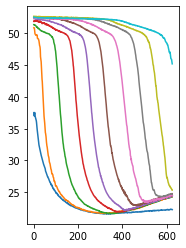

In [18]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(df_tem_entropy_conc, ax, fig, alpha =0.7, scm=None)

In [19]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(df_tem_entropy_conc)
df_nrm = pd.DataFrame(df_nrm)
#df_nrm.columns = chargingIn_df.columns

df_nrm.columns = ['entropy', 'availability', 'flowLoad', 'T0', 'T1', 'T2', 'T3', \
                  'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
df_nrm

,entropy,availability,flowLoad,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,0.000000,1.000000,0.444447,1.000000,1.000000,1.000000,0.993228,1.000000,0.998850,0.998827,0.998798,1.000000,1.000000
1,0.012996,0.999198,0.727274,0.985101,0.998834,0.998857,0.996614,1.000000,1.000000,0.998827,0.998798,0.998754,1.000000
2,0.030290,0.998348,0.989900,0.965951,0.998834,1.000000,0.994357,1.000000,0.996549,0.998827,0.998798,0.998754,1.000000
3,0.039133,0.996549,1.000000,0.989357,0.990679,0.998857,0.997743,1.000000,0.998850,0.998827,0.998798,0.998754,0.995344
4,0.041981,0.997556,0.909096,1.000000,0.977861,0.998857,0.997743,1.000000,0.995399,1.000000,0.998798,0.998754,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0.914880,0.000448,0.131306,0.044485,0.088976,0.087548,0.086162,0.072729,0.052472,0.038391,0.015505,0.009887,0.102217
622,0.904081,0.001187,0.141407,0.044485,0.088976,0.088684,0.086162,0.073847,0.051332,0.039553,0.015505,0.004942,0.097575
623,0.893808,0.000760,0.151507,0.044485,0.090131,0.088684,0.086162,0.074966,0.055896,0.040720,0.014310,0.002473,0.069697
624,0.888743,0.000526,0.151507,0.044485,0.090131,0.088684,0.086162,0.074966,0.062741,0.039553,0.014310,0.000000,0.037162


In [20]:
k =3
n_features = 13
#out_features = y_train.shape[1]
#out_features
epochs =10000
batch_size = 50

In [21]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), \
                                   m.iloc[i-k:i, :]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys


In [24]:
X = df_nrm.iloc[:, 3:]
y =df_nrm.iloc[:, 3:]
mh = df_nrm[[ 'entropy', 'availability', 'flowLoad']]
X

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1.000000,1.000000,1.000000,0.993228,1.000000,0.998850,0.998827,0.998798,1.000000,1.000000
1,0.985101,0.998834,0.998857,0.996614,1.000000,1.000000,0.998827,0.998798,0.998754,1.000000
2,0.965951,0.998834,1.000000,0.994357,1.000000,0.996549,0.998827,0.998798,0.998754,1.000000
3,0.989357,0.990679,0.998857,0.997743,1.000000,0.998850,0.998827,0.998798,0.998754,0.995344
4,1.000000,0.977861,0.998857,0.997743,1.000000,0.995399,1.000000,0.998798,0.998754,1.000000
...,...,...,...,...,...,...,...,...,...,...
621,0.044485,0.088976,0.087548,0.086162,0.072729,0.052472,0.038391,0.015505,0.009887,0.102217
622,0.044485,0.088976,0.088684,0.086162,0.073847,0.051332,0.039553,0.015505,0.004942,0.097575
623,0.044485,0.090131,0.088684,0.086162,0.074966,0.055896,0.040720,0.014310,0.002473,0.069697
624,0.044485,0.090131,0.088684,0.086162,0.074966,0.062741,0.039553,0.014310,0.000000,0.037162


In [25]:
Xdf1, ydf1 = prepare_df(X, mhp, y)

In [27]:
Xdf1.shape

(623, 39)

In [28]:

ydf1.shape

(623, 10)

In [29]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [30]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [31]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [32]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [33]:
X_train.shape, y_train.shape

((498, 39), (498, 10))

In [34]:
out_features = y_train.shape[1]

In [35]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(10, input_shape = (time_steps, n_features)))
    #model.add(Dropout(0.2))
    
    #model.add(Dense(3))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

#So the val loss depends on the number of LSRTM nurons, 8 is reducing the val loss untill 0.208 thn
#increases
#Dense layer dosent work

In [36]:

model = create_model(k, n_features)
model_fpath=modelDir(ModelName='added_features1.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,                 
                                   mode="min")]

In [37]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 348 samples, validate on 150 samples
Epoch 1/10000
348/348 [==============================] - 1s 3ms/step - loss: 0.6520 - mean_squared_error: 0.6520 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 2/10000
348/348 [==============================] - 0s 299us/step - loss: 0.5928 - mean_squared_error: 0.5928 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 3/10000
348/348 [==============================] - 0s 187us/step - loss: 0.5414 - mean_squared_error: 0.5414 - val_loss: 0.1128 - val_mean_squared_error: 0.1128
Epoch 4/10000
348/348 [==============================] - 0s 215us/step - loss: 0.4952 - mean_squared_error: 0.4952 - val_loss: 0.1073 - val_mean_squared_error: 0.1073
Epoch 5/10000
348/348 [==============================] - 0s 229us/step - loss: 0.4518 - mean_squared_error: 0.4518 - val_loss: 0.1023 - val_mean_squared_error: 0.1023
Epoch 6/10000
348/348 [==============================] - 0s 195us/step - loss: 0.4090 - mean_squared_error: 0.4090 - val_

348/348 [==============================] - 0s 157us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 98/10000
348/348 [==============================] - 0s 160us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 99/10000
348/348 [==============================] - 0s 155us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 100/10000
348/348 [==============================] - 0s 154us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 101/10000
348/348 [==============================] - 0s 142us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 102/10000
348/348 [==============================] - 0s 156us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoc

348/348 [==============================] - 0s 178us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 194/10000
348/348 [==============================] - 0s 209us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 195/10000
348/348 [==============================] - 0s 190us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 196/10000
348/348 [==============================] - 0s 172us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 197/10000
348/348 [==============================] - 0s 144us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 198/10000
348/348 [==============================] - 0s 151us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Ep

348/348 [==============================] - 0s 263us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 290/10000
348/348 [==============================] - 0s 190us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 291/10000
348/348 [==============================] - 0s 184us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 292/10000
348/348 [==============================] - 0s 179us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 293/10000
348/348 [==============================] - 0s 169us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 294/10000
348/348 [==============================] - 0s 219us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Ep

348/348 [==============================] - 0s 334us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 386/10000
348/348 [==============================] - 0s 327us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 387/10000
348/348 [==============================] - 0s 280us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 388/10000
348/348 [==============================] - 0s 240us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 389/10000
348/348 [==============================] - 0s 399us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 390/10000
348/348 [==============================] - 0s 288us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Ep

348/348 [==============================] - 0s 173us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 482/10000
348/348 [==============================] - 0s 228us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 483/10000
348/348 [==============================] - 0s 187us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 484/10000
348/348 [==============================] - 0s 284us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 485/10000
348/348 [==============================] - 0s 205us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 486/10000
348/348 [==============================] - 0s 257us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Ep

Epoch 577/10000
348/348 [==============================] - 0s 189us/step - loss: 8.8973e-04 - mean_squared_error: 8.8973e-04 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 578/10000
348/348 [==============================] - 0s 200us/step - loss: 8.7796e-04 - mean_squared_error: 8.7796e-04 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 579/10000
348/348 [==============================] - 0s 199us/step - loss: 8.7217e-04 - mean_squared_error: 8.7217e-04 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 580/10000
348/348 [==============================] - 0s 201us/step - loss: 8.6425e-04 - mean_squared_error: 8.6425e-04 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 581/10000
348/348 [==============================] - 0s 201us/step - loss: 8.5670e-04 - mean_squared_error: 8.5670e-04 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 582/10000
348/348 [==============================] - 0s 189us/step - loss: 8.5175e-04 - mean_squared_error: 8

348/348 [==============================] - 0s 235us/step - loss: 3.8351e-04 - mean_squared_error: 3.8351e-04 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 670/10000
348/348 [==============================] - 0s 217us/step - loss: 3.8127e-04 - mean_squared_error: 3.8127e-04 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 671/10000
348/348 [==============================] - 0s 292us/step - loss: 3.7593e-04 - mean_squared_error: 3.7593e-04 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 672/10000
348/348 [==============================] - 0s 328us/step - loss: 3.7601e-04 - mean_squared_error: 3.7601e-04 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 673/10000
348/348 [==============================] - 0s 241us/step - loss: 3.7518e-04 - mean_squared_error: 3.7518e-04 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 674/10000
348/348 [==============================] - 0s 214us/step - loss: 3.6905e-04 - mean_squared_error: 3.6905e-04 - val_

348/348 [==============================] - 0s 282us/step - loss: 1.6920e-04 - mean_squared_error: 1.6920e-04 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 762/10000
348/348 [==============================] - 0s 213us/step - loss: 1.6805e-04 - mean_squared_error: 1.6805e-04 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 763/10000
348/348 [==============================] - 0s 289us/step - loss: 1.6518e-04 - mean_squared_error: 1.6518e-04 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 764/10000
348/348 [==============================] - 0s 251us/step - loss: 1.6551e-04 - mean_squared_error: 1.6551e-04 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 765/10000
348/348 [==============================] - 0s 185us/step - loss: 1.6536e-04 - mean_squared_error: 1.6536e-04 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 766/10000
348/348 [==============================] - 0s 153us/step - loss: 1.6319e-04 - mean_squared_error: 1.6319e-04 - val_

348/348 [==============================] - 0s 128us/step - loss: 1.2867e-04 - mean_squared_error: 1.2867e-04 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 854/10000
348/348 [==============================] - 0s 191us/step - loss: 1.2820e-04 - mean_squared_error: 1.2820e-04 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 855/10000
348/348 [==============================] - 0s 399us/step - loss: 1.2823e-04 - mean_squared_error: 1.2823e-04 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 856/10000
348/348 [==============================] - 0s 281us/step - loss: 1.2736e-04 - mean_squared_error: 1.2736e-04 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 857/10000
348/348 [==============================] - 0s 336us/step - loss: 1.2633e-04 - mean_squared_error: 1.2633e-04 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 858/10000
348/348 [==============================] - 0s 264us/step - loss: 1.2657e-04 - mean_squared_error: 1.2657e-04 - val_

348/348 [==============================] - 0s 150us/step - loss: 1.1427e-04 - mean_squared_error: 1.1427e-04 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 946/10000
348/348 [==============================] - 0s 148us/step - loss: 1.1529e-04 - mean_squared_error: 1.1529e-04 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 947/10000
348/348 [==============================] - 0s 140us/step - loss: 1.1776e-04 - mean_squared_error: 1.1776e-04 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 948/10000
348/348 [==============================] - 0s 137us/step - loss: 1.1875e-04 - mean_squared_error: 1.1875e-04 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 949/10000
348/348 [==============================] - 0s 139us/step - loss: 1.1669e-04 - mean_squared_error: 1.1669e-04 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 950/10000
348/348 [==============================] - 0s 136us/step - loss: 1.1614e-04 - mean_squared_error: 1.1614e-04 - val_

348/348 [==============================] - 0s 193us/step - loss: 1.0341e-04 - mean_squared_error: 1.0341e-04 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 1038/10000
348/348 [==============================] - 0s 224us/step - loss: 1.0445e-04 - mean_squared_error: 1.0445e-04 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 1039/10000
348/348 [==============================] - 0s 260us/step - loss: 1.0392e-04 - mean_squared_error: 1.0392e-04 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 1040/10000
348/348 [==============================] - 0s 189us/step - loss: 1.0437e-04 - mean_squared_error: 1.0437e-04 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 1041/10000
348/348 [==============================] - 0s 164us/step - loss: 1.0411e-04 - mean_squared_error: 1.0411e-04 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 1042/10000
348/348 [==============================] - 0s 174us/step - loss: 1.0326e-04 - mean_squared_error: 1.0326e-04 -

348/348 [==============================] - 0s 167us/step - loss: 9.9838e-05 - mean_squared_error: 9.9838e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 1130/10000
348/348 [==============================] - 0s 271us/step - loss: 1.0036e-04 - mean_squared_error: 1.0036e-04 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 1131/10000
348/348 [==============================] - 0s 289us/step - loss: 1.0059e-04 - mean_squared_error: 1.0059e-04 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 1132/10000
348/348 [==============================] - 0s 263us/step - loss: 1.0080e-04 - mean_squared_error: 1.0080e-04 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 1133/10000
348/348 [==============================] - 0s 166us/step - loss: 1.0046e-04 - mean_squared_error: 1.0046e-04 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 1134/10000
348/348 [==============================] - 0s 158us/step - loss: 9.9566e-05 - mean_squared_error: 9.9566e-05 -

348/348 [==============================] - 0s 142us/step - loss: 9.3628e-05 - mean_squared_error: 9.3628e-05 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1222/10000
348/348 [==============================] - 0s 141us/step - loss: 9.3699e-05 - mean_squared_error: 9.3699e-05 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1223/10000
348/348 [==============================] - 0s 297us/step - loss: 9.3153e-05 - mean_squared_error: 9.3153e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1224/10000
348/348 [==============================] - 0s 205us/step - loss: 9.4533e-05 - mean_squared_error: 9.4533e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1225/10000
348/348 [==============================] - 0s 157us/step - loss: 9.6823e-05 - mean_squared_error: 9.6823e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1226/10000
348/348 [==============================] - 0s 206us/step - loss: 9.6604e-05 - mean_squared_error: 9.6604e-05 -

348/348 [==============================] - 0s 244us/step - loss: 8.9083e-05 - mean_squared_error: 8.9083e-05 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 1314/10000
348/348 [==============================] - 0s 134us/step - loss: 8.9026e-05 - mean_squared_error: 8.9026e-05 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 1315/10000
348/348 [==============================] - 0s 142us/step - loss: 8.8517e-05 - mean_squared_error: 8.8517e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1316/10000
348/348 [==============================] - 0s 136us/step - loss: 8.8641e-05 - mean_squared_error: 8.8641e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1317/10000
348/348 [==============================] - 0s 163us/step - loss: 8.9978e-05 - mean_squared_error: 8.9978e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1318/10000
348/348 [==============================] - 0s 141us/step - loss: 9.0266e-05 - mean_squared_error: 9.0266e-05 -

348/348 [==============================] - 0s 152us/step - loss: 8.5886e-05 - mean_squared_error: 8.5886e-05 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 1406/10000
348/348 [==============================] - 0s 189us/step - loss: 8.4670e-05 - mean_squared_error: 8.4670e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1407/10000
348/348 [==============================] - 0s 280us/step - loss: 8.7696e-05 - mean_squared_error: 8.7696e-05 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 1408/10000
348/348 [==============================] - 0s 188us/step - loss: 8.5001e-05 - mean_squared_error: 8.5001e-05 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 1409/10000
348/348 [==============================] - 0s 137us/step - loss: 8.6404e-05 - mean_squared_error: 8.6404e-05 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 1410/10000
348/348 [==============================] - 0s 168us/step - loss: 8.7328e-05 - mean_squared_error: 8.7328e-05 -

348/348 [==============================] - 0s 139us/step - loss: 8.1646e-05 - mean_squared_error: 8.1646e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1498/10000
348/348 [==============================] - 0s 143us/step - loss: 8.0058e-05 - mean_squared_error: 8.0058e-05 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 1499/10000
348/348 [==============================] - 0s 129us/step - loss: 8.0402e-05 - mean_squared_error: 8.0402e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1500/10000
348/348 [==============================] - 0s 131us/step - loss: 7.9785e-05 - mean_squared_error: 7.9785e-05 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 1501/10000
348/348 [==============================] - 0s 141us/step - loss: 8.1242e-05 - mean_squared_error: 8.1242e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1502/10000
348/348 [==============================] - 0s 140us/step - loss: 8.2047e-05 - mean_squared_error: 8.2047e-05 -

348/348 [==============================] - 0s 137us/step - loss: 7.8230e-05 - mean_squared_error: 7.8230e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1590/10000
348/348 [==============================] - 0s 139us/step - loss: 7.9098e-05 - mean_squared_error: 7.9098e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1591/10000
348/348 [==============================] - 0s 144us/step - loss: 7.7388e-05 - mean_squared_error: 7.7388e-05 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 1592/10000
348/348 [==============================] - 0s 198us/step - loss: 7.6290e-05 - mean_squared_error: 7.6290e-05 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 1593/10000
348/348 [==============================] - 0s 147us/step - loss: 7.8710e-05 - mean_squared_error: 7.8710e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1594/10000
348/348 [==============================] - 0s 143us/step - loss: 7.7603e-05 - mean_squared_error: 7.7603e-05 -

348/348 [==============================] - 0s 139us/step - loss: 7.4644e-05 - mean_squared_error: 7.4644e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1682/10000
348/348 [==============================] - 0s 134us/step - loss: 7.4668e-05 - mean_squared_error: 7.4668e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1683/10000
348/348 [==============================] - 0s 139us/step - loss: 7.3366e-05 - mean_squared_error: 7.3366e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1684/10000
348/348 [==============================] - 0s 140us/step - loss: 7.3785e-05 - mean_squared_error: 7.3785e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1685/10000
348/348 [==============================] - 0s 141us/step - loss: 7.2989e-05 - mean_squared_error: 7.2989e-05 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 1686/10000
348/348 [==============================] - 0s 125us/step - loss: 7.5162e-05 - mean_squared_error: 7.5162e-05 -

348/348 [==============================] - 0s 171us/step - loss: 6.7246e-05 - mean_squared_error: 6.7246e-05 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 1774/10000
348/348 [==============================] - 0s 186us/step - loss: 6.7556e-05 - mean_squared_error: 6.7556e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1775/10000
348/348 [==============================] - 0s 163us/step - loss: 6.8888e-05 - mean_squared_error: 6.8888e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1776/10000
348/348 [==============================] - 0s 175us/step - loss: 7.2070e-05 - mean_squared_error: 7.2070e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1777/10000
348/348 [==============================] - 0s 169us/step - loss: 7.0780e-05 - mean_squared_error: 7.0780e-05 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 1778/10000
348/348 [==============================] - 0s 192us/step - loss: 6.9569e-05 - mean_squared_error: 6.9569e-05 -

348/348 [==============================] - 0s 216us/step - loss: 6.3348e-05 - mean_squared_error: 6.3348e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1866/10000
348/348 [==============================] - 0s 164us/step - loss: 6.4906e-05 - mean_squared_error: 6.4906e-05 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 1867/10000
348/348 [==============================] - 0s 167us/step - loss: 6.2826e-05 - mean_squared_error: 6.2826e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1868/10000
348/348 [==============================] - 0s 197us/step - loss: 6.2108e-05 - mean_squared_error: 6.2108e-05 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1869/10000
348/348 [==============================] - 0s 167us/step - loss: 6.2233e-05 - mean_squared_error: 6.2233e-05 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 1870/10000
348/348 [==============================] - 0s 196us/step - loss: 6.0534e-05 - mean_squared_error: 6.0534e-05 -

348/348 [==============================] - 0s 282us/step - loss: 5.5809e-05 - mean_squared_error: 5.5809e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 1958/10000
348/348 [==============================] - 0s 210us/step - loss: 5.5727e-05 - mean_squared_error: 5.5727e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 1959/10000
348/348 [==============================] - 0s 173us/step - loss: 5.4892e-05 - mean_squared_error: 5.4892e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1960/10000
348/348 [==============================] - 0s 173us/step - loss: 5.5075e-05 - mean_squared_error: 5.5075e-05 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 1961/10000
348/348 [==============================] - 0s 190us/step - loss: 5.3741e-05 - mean_squared_error: 5.3741e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 1962/10000
348/348 [==============================] - 0s 167us/step - loss: 5.5749e-05 - mean_squared_error: 5.5749e-05 -

348/348 [==============================] - 0s 256us/step - loss: 4.8314e-05 - mean_squared_error: 4.8314e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2050/10000
348/348 [==============================] - 0s 230us/step - loss: 4.7534e-05 - mean_squared_error: 4.7534e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2051/10000
348/348 [==============================] - 0s 258us/step - loss: 4.8950e-05 - mean_squared_error: 4.8950e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2052/10000
348/348 [==============================] - 0s 269us/step - loss: 4.9096e-05 - mean_squared_error: 4.9096e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2053/10000
348/348 [==============================] - 0s 252us/step - loss: 4.9492e-05 - mean_squared_error: 4.9492e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2054/10000
348/348 [==============================] - 0s 164us/step - loss: 4.9020e-05 - mean_squared_error: 4.9020e-05 -

348/348 [==============================] - 0s 170us/step - loss: 4.2088e-05 - mean_squared_error: 4.2088e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 2142/10000
348/348 [==============================] - 0s 173us/step - loss: 4.2166e-05 - mean_squared_error: 4.2166e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 2143/10000
348/348 [==============================] - 0s 124us/step - loss: 4.1443e-05 - mean_squared_error: 4.1443e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2144/10000
348/348 [==============================] - 0s 137us/step - loss: 4.1764e-05 - mean_squared_error: 4.1764e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2145/10000
348/348 [==============================] - 0s 248us/step - loss: 4.4828e-05 - mean_squared_error: 4.4828e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 2146/10000
348/348 [==============================] - 0s 287us/step - loss: 4.8619e-05 - mean_squared_error: 4.8619e-05 -

348/348 [==============================] - 0s 184us/step - loss: 3.6891e-05 - mean_squared_error: 3.6891e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 2234/10000
348/348 [==============================] - 0s 176us/step - loss: 3.5725e-05 - mean_squared_error: 3.5725e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 2235/10000
348/348 [==============================] - 0s 260us/step - loss: 3.7636e-05 - mean_squared_error: 3.7636e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 2236/10000
348/348 [==============================] - 0s 199us/step - loss: 3.6325e-05 - mean_squared_error: 3.6325e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 2237/10000
348/348 [==============================] - 0s 170us/step - loss: 3.6358e-05 - mean_squared_error: 3.6358e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 2238/10000
348/348 [==============================] - 0s 178us/step - loss: 3.6715e-05 - mean_squared_error: 3.6715e-05 -

348/348 [==============================] - 0s 172us/step - loss: 3.2133e-05 - mean_squared_error: 3.2133e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 2326/10000
348/348 [==============================] - 0s 261us/step - loss: 3.2135e-05 - mean_squared_error: 3.2135e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 2327/10000
348/348 [==============================] - 0s 216us/step - loss: 3.2292e-05 - mean_squared_error: 3.2292e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 2328/10000
348/348 [==============================] - 0s 227us/step - loss: 3.3724e-05 - mean_squared_error: 3.3724e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 2329/10000
348/348 [==============================] - 0s 164us/step - loss: 3.7785e-05 - mean_squared_error: 3.7785e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 2330/10000
348/348 [==============================] - 0s 162us/step - loss: 3.6464e-05 - mean_squared_error: 3.6464e-05 -

348/348 [==============================] - 0s 194us/step - loss: 2.7838e-05 - mean_squared_error: 2.7838e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 2418/10000
348/348 [==============================] - 0s 158us/step - loss: 2.7996e-05 - mean_squared_error: 2.7996e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 2419/10000
348/348 [==============================] - 0s 170us/step - loss: 2.9390e-05 - mean_squared_error: 2.9390e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 2420/10000
348/348 [==============================] - 0s 169us/step - loss: 2.9874e-05 - mean_squared_error: 2.9874e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 2421/10000
348/348 [==============================] - 0s 191us/step - loss: 2.9189e-05 - mean_squared_error: 2.9189e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 2422/10000
348/348 [==============================] - 0s 311us/step - loss: 2.8423e-05 - mean_squared_error: 2.8423e-05 -

348/348 [==============================] - 0s 215us/step - loss: 2.6492e-05 - mean_squared_error: 2.6492e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 2510/10000
348/348 [==============================] - 0s 299us/step - loss: 2.5886e-05 - mean_squared_error: 2.5886e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 2511/10000
348/348 [==============================] - 0s 232us/step - loss: 2.5839e-05 - mean_squared_error: 2.5839e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 2512/10000
348/348 [==============================] - 0s 302us/step - loss: 2.5603e-05 - mean_squared_error: 2.5603e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 2513/10000
348/348 [==============================] - 0s 367us/step - loss: 2.6404e-05 - mean_squared_error: 2.6404e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 2514/10000
348/348 [==============================] - 0s 293us/step - loss: 2.5941e-05 - mean_squared_error: 2.5941e-05 -

348/348 [==============================] - 0s 233us/step - loss: 2.7865e-05 - mean_squared_error: 2.7865e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 2602/10000
348/348 [==============================] - 0s 265us/step - loss: 2.7249e-05 - mean_squared_error: 2.7249e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2603/10000
348/348 [==============================] - 0s 233us/step - loss: 2.5612e-05 - mean_squared_error: 2.5612e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2604/10000
348/348 [==============================] - 0s 247us/step - loss: 2.4027e-05 - mean_squared_error: 2.4027e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2605/10000
348/348 [==============================] - 0s 298us/step - loss: 2.3361e-05 - mean_squared_error: 2.3361e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2606/10000
348/348 [==============================] - 0s 215us/step - loss: 2.3533e-05 - mean_squared_error: 2.3533e-05 -

348/348 [==============================] - 0s 215us/step - loss: 2.1840e-05 - mean_squared_error: 2.1840e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2694/10000
348/348 [==============================] - 0s 209us/step - loss: 2.1006e-05 - mean_squared_error: 2.1006e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2695/10000
348/348 [==============================] - 0s 252us/step - loss: 2.2055e-05 - mean_squared_error: 2.2055e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2696/10000
348/348 [==============================] - 0s 166us/step - loss: 2.1324e-05 - mean_squared_error: 2.1324e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2697/10000
348/348 [==============================] - 0s 156us/step - loss: 2.0936e-05 - mean_squared_error: 2.0936e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2698/10000
348/348 [==============================] - 0s 195us/step - loss: 2.1152e-05 - mean_squared_error: 2.1152e-05 -

348/348 [==============================] - 0s 194us/step - loss: 2.2345e-05 - mean_squared_error: 2.2345e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2786/10000
348/348 [==============================] - 0s 225us/step - loss: 2.1046e-05 - mean_squared_error: 2.1046e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2787/10000
348/348 [==============================] - 0s 169us/step - loss: 1.9609e-05 - mean_squared_error: 1.9609e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2788/10000
348/348 [==============================] - 0s 170us/step - loss: 1.9678e-05 - mean_squared_error: 1.9678e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2789/10000
348/348 [==============================] - 0s 177us/step - loss: 1.9275e-05 - mean_squared_error: 1.9275e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2790/10000
348/348 [==============================] - 0s 185us/step - loss: 2.0168e-05 - mean_squared_error: 2.0168e-05 -

348/348 [==============================] - 0s 190us/step - loss: 2.0136e-05 - mean_squared_error: 2.0136e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2878/10000
348/348 [==============================] - 0s 264us/step - loss: 1.8680e-05 - mean_squared_error: 1.8680e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2879/10000
348/348 [==============================] - 0s 216us/step - loss: 1.9380e-05 - mean_squared_error: 1.9380e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2880/10000
348/348 [==============================] - 0s 182us/step - loss: 1.8691e-05 - mean_squared_error: 1.8691e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2881/10000
348/348 [==============================] - 0s 260us/step - loss: 1.8014e-05 - mean_squared_error: 1.8014e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2882/10000
348/348 [==============================] - 0s 220us/step - loss: 1.8483e-05 - mean_squared_error: 1.8483e-05 -

348/348 [==============================] - 0s 172us/step - loss: 1.8615e-05 - mean_squared_error: 1.8615e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2970/10000
348/348 [==============================] - 0s 153us/step - loss: 1.8081e-05 - mean_squared_error: 1.8081e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2971/10000
348/348 [==============================] - 0s 163us/step - loss: 1.7580e-05 - mean_squared_error: 1.7580e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2972/10000
348/348 [==============================] - 0s 162us/step - loss: 1.6551e-05 - mean_squared_error: 1.6551e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2973/10000
348/348 [==============================] - 0s 168us/step - loss: 1.7361e-05 - mean_squared_error: 1.7361e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2974/10000
348/348 [==============================] - 0s 210us/step - loss: 1.6943e-05 - mean_squared_error: 1.6943e-05 -

348/348 [==============================] - 0s 177us/step - loss: 1.6848e-05 - mean_squared_error: 1.6848e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 3062/10000
348/348 [==============================] - 0s 189us/step - loss: 1.7499e-05 - mean_squared_error: 1.7499e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3063/10000
348/348 [==============================] - 0s 225us/step - loss: 1.6579e-05 - mean_squared_error: 1.6579e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3064/10000
348/348 [==============================] - 0s 208us/step - loss: 1.6855e-05 - mean_squared_error: 1.6855e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3065/10000
348/348 [==============================] - 0s 202us/step - loss: 1.7060e-05 - mean_squared_error: 1.7060e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3066/10000
348/348 [==============================] - 0s 173us/step - loss: 1.7671e-05 - mean_squared_error: 1.7671e-05 -

348/348 [==============================] - 0s 165us/step - loss: 1.6895e-05 - mean_squared_error: 1.6895e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3154/10000
348/348 [==============================] - 0s 176us/step - loss: 1.7640e-05 - mean_squared_error: 1.7640e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3155/10000
348/348 [==============================] - 0s 202us/step - loss: 1.6021e-05 - mean_squared_error: 1.6021e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3156/10000
348/348 [==============================] - 0s 236us/step - loss: 1.5953e-05 - mean_squared_error: 1.5953e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3157/10000
348/348 [==============================] - 0s 217us/step - loss: 1.5664e-05 - mean_squared_error: 1.5664e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3158/10000
348/348 [==============================] - 0s 277us/step - loss: 1.5385e-05 - mean_squared_error: 1.5385e-05 -

348/348 [==============================] - 0s 158us/step - loss: 1.7343e-05 - mean_squared_error: 1.7343e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3246/10000
348/348 [==============================] - 0s 140us/step - loss: 1.6898e-05 - mean_squared_error: 1.6898e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3247/10000
348/348 [==============================] - 0s 162us/step - loss: 1.5331e-05 - mean_squared_error: 1.5331e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3248/10000
348/348 [==============================] - 0s 197us/step - loss: 1.5573e-05 - mean_squared_error: 1.5573e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3249/10000
348/348 [==============================] - 0s 251us/step - loss: 1.5587e-05 - mean_squared_error: 1.5587e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3250/10000
348/348 [==============================] - 0s 207us/step - loss: 1.5361e-05 - mean_squared_error: 1.5361e-05 -

348/348 [==============================] - 0s 239us/step - loss: 1.4935e-05 - mean_squared_error: 1.4935e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 3338/10000
348/348 [==============================] - 0s 203us/step - loss: 1.6410e-05 - mean_squared_error: 1.6410e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3339/10000
348/348 [==============================] - 0s 225us/step - loss: 1.5695e-05 - mean_squared_error: 1.5695e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3340/10000
348/348 [==============================] - 0s 238us/step - loss: 1.6563e-05 - mean_squared_error: 1.6563e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3341/10000
348/348 [==============================] - 0s 236us/step - loss: 1.4048e-05 - mean_squared_error: 1.4048e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 3342/10000
348/348 [==============================] - 0s 265us/step - loss: 1.3446e-05 - mean_squared_error: 1.3446e-05 -

348/348 [==============================] - 0s 144us/step - loss: 1.3984e-05 - mean_squared_error: 1.3984e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3430/10000
348/348 [==============================] - 0s 143us/step - loss: 1.4105e-05 - mean_squared_error: 1.4105e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3431/10000
348/348 [==============================] - 0s 139us/step - loss: 1.5534e-05 - mean_squared_error: 1.5534e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3432/10000
348/348 [==============================] - 0s 156us/step - loss: 1.4591e-05 - mean_squared_error: 1.4591e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3433/10000
348/348 [==============================] - 0s 187us/step - loss: 1.4592e-05 - mean_squared_error: 1.4592e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3434/10000
348/348 [==============================] - 0s 580us/step - loss: 1.5164e-05 - mean_squared_error: 1.5164e-05 -

348/348 [==============================] - 0s 232us/step - loss: 1.3755e-05 - mean_squared_error: 1.3755e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3522/10000
348/348 [==============================] - 0s 202us/step - loss: 1.2896e-05 - mean_squared_error: 1.2896e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3523/10000
348/348 [==============================] - 0s 212us/step - loss: 1.3613e-05 - mean_squared_error: 1.3613e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3524/10000
348/348 [==============================] - 0s 177us/step - loss: 1.3651e-05 - mean_squared_error: 1.3651e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 3525/10000
348/348 [==============================] - 0s 168us/step - loss: 1.4051e-05 - mean_squared_error: 1.4051e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3526/10000
348/348 [==============================] - 0s 185us/step - loss: 1.5139e-05 - mean_squared_error: 1.5139e-05 -

348/348 [==============================] - 0s 201us/step - loss: 1.3373e-05 - mean_squared_error: 1.3373e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3614/10000
348/348 [==============================] - 0s 285us/step - loss: 1.3753e-05 - mean_squared_error: 1.3753e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3615/10000
348/348 [==============================] - 0s 241us/step - loss: 1.3796e-05 - mean_squared_error: 1.3796e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 3616/10000
348/348 [==============================] - 0s 207us/step - loss: 1.3868e-05 - mean_squared_error: 1.3868e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3617/10000
348/348 [==============================] - 0s 206us/step - loss: 1.3766e-05 - mean_squared_error: 1.3766e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3618/10000
348/348 [==============================] - 0s 248us/step - loss: 1.5647e-05 - mean_squared_error: 1.5647e-05 -

348/348 [==============================] - 0s 190us/step - loss: 1.4774e-05 - mean_squared_error: 1.4774e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3706/10000
348/348 [==============================] - 0s 204us/step - loss: 1.3714e-05 - mean_squared_error: 1.3714e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3707/10000
348/348 [==============================] - 0s 200us/step - loss: 1.2913e-05 - mean_squared_error: 1.2913e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3708/10000
348/348 [==============================] - 0s 144us/step - loss: 1.1889e-05 - mean_squared_error: 1.1889e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3709/10000
348/348 [==============================] - 0s 253us/step - loss: 1.2507e-05 - mean_squared_error: 1.2507e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3710/10000
348/348 [==============================] - 0s 195us/step - loss: 1.1873e-05 - mean_squared_error: 1.1873e-05 -

348/348 [==============================] - 0s 185us/step - loss: 1.1553e-05 - mean_squared_error: 1.1553e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3798/10000
348/348 [==============================] - 0s 203us/step - loss: 1.1748e-05 - mean_squared_error: 1.1748e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3799/10000
348/348 [==============================] - 0s 198us/step - loss: 1.1548e-05 - mean_squared_error: 1.1548e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3800/10000
348/348 [==============================] - 0s 199us/step - loss: 1.2286e-05 - mean_squared_error: 1.2286e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3801/10000
348/348 [==============================] - 0s 182us/step - loss: 1.2184e-05 - mean_squared_error: 1.2184e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3802/10000
348/348 [==============================] - 0s 187us/step - loss: 1.2553e-05 - mean_squared_error: 1.2553e-05 -

348/348 [==============================] - 0s 295us/step - loss: 1.0992e-05 - mean_squared_error: 1.0992e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3890/10000
348/348 [==============================] - 0s 305us/step - loss: 1.1086e-05 - mean_squared_error: 1.1086e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3891/10000
348/348 [==============================] - 0s 294us/step - loss: 1.1414e-05 - mean_squared_error: 1.1414e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3892/10000
348/348 [==============================] - 0s 163us/step - loss: 1.2091e-05 - mean_squared_error: 1.2091e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3893/10000
348/348 [==============================] - 0s 199us/step - loss: 1.1749e-05 - mean_squared_error: 1.1749e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3894/10000
348/348 [==============================] - 0s 155us/step - loss: 1.2086e-05 - mean_squared_error: 1.2086e-05 -

348/348 [==============================] - 0s 143us/step - loss: 1.0745e-05 - mean_squared_error: 1.0745e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3982/10000
348/348 [==============================] - 0s 139us/step - loss: 1.2188e-05 - mean_squared_error: 1.2188e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3983/10000
348/348 [==============================] - 0s 139us/step - loss: 1.3052e-05 - mean_squared_error: 1.3052e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3984/10000
348/348 [==============================] - 0s 138us/step - loss: 1.3087e-05 - mean_squared_error: 1.3087e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3985/10000
348/348 [==============================] - 0s 138us/step - loss: 1.3011e-05 - mean_squared_error: 1.3011e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3986/10000
348/348 [==============================] - 0s 181us/step - loss: 1.1512e-05 - mean_squared_error: 1.1512e-05 -

348/348 [==============================] - 0s 134us/step - loss: 1.4642e-05 - mean_squared_error: 1.4642e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 4074/10000
348/348 [==============================] - 0s 148us/step - loss: 1.2613e-05 - mean_squared_error: 1.2613e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4075/10000
348/348 [==============================] - 0s 265us/step - loss: 1.0435e-05 - mean_squared_error: 1.0435e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 4076/10000
348/348 [==============================] - 0s 207us/step - loss: 1.1269e-05 - mean_squared_error: 1.1269e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4077/10000
348/348 [==============================] - 0s 172us/step - loss: 1.1042e-05 - mean_squared_error: 1.1042e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 4078/10000
348/348 [==============================] - 0s 171us/step - loss: 1.1462e-05 - mean_squared_error: 1.1462e-05 -

348/348 [==============================] - 0s 139us/step - loss: 1.1051e-05 - mean_squared_error: 1.1051e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4166/10000
348/348 [==============================] - 0s 132us/step - loss: 1.2864e-05 - mean_squared_error: 1.2864e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4167/10000
348/348 [==============================] - 0s 139us/step - loss: 1.2519e-05 - mean_squared_error: 1.2519e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4168/10000
348/348 [==============================] - 0s 155us/step - loss: 1.2361e-05 - mean_squared_error: 1.2361e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4169/10000
348/348 [==============================] - 0s 147us/step - loss: 1.1458e-05 - mean_squared_error: 1.1458e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4170/10000
348/348 [==============================] - 0s 187us/step - loss: 1.0770e-05 - mean_squared_error: 1.0770e-05 -

348/348 [==============================] - 0s 138us/step - loss: 1.0700e-05 - mean_squared_error: 1.0700e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4258/10000
348/348 [==============================] - 0s 142us/step - loss: 1.1414e-05 - mean_squared_error: 1.1414e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 4259/10000
348/348 [==============================] - 0s 145us/step - loss: 1.0254e-05 - mean_squared_error: 1.0254e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4260/10000
348/348 [==============================] - 0s 162us/step - loss: 1.0433e-05 - mean_squared_error: 1.0433e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4261/10000
348/348 [==============================] - 0s 219us/step - loss: 1.0335e-05 - mean_squared_error: 1.0335e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4262/10000
348/348 [==============================] - 0s 186us/step - loss: 1.0282e-05 - mean_squared_error: 1.0282e-05 -

348/348 [==============================] - 0s 133us/step - loss: 9.7530e-06 - mean_squared_error: 9.7530e-06 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4350/10000
348/348 [==============================] - 0s 133us/step - loss: 1.0048e-05 - mean_squared_error: 1.0048e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4351/10000
348/348 [==============================] - 0s 133us/step - loss: 1.0225e-05 - mean_squared_error: 1.0225e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4352/10000
348/348 [==============================] - 0s 145us/step - loss: 9.9600e-06 - mean_squared_error: 9.9600e-06 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4353/10000
348/348 [==============================] - 0s 165us/step - loss: 9.9837e-06 - mean_squared_error: 9.9837e-06 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 4354/10000
348/348 [==============================] - 0s 118us/step - loss: 1.0226e-05 - mean_squared_error: 1.0226e-05 -

348/348 [==============================] - 0s 363us/step - loss: 9.4520e-06 - mean_squared_error: 9.4520e-06 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4442/10000
348/348 [==============================] - 0s 220us/step - loss: 9.6905e-06 - mean_squared_error: 9.6905e-06 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4443/10000
348/348 [==============================] - 0s 225us/step - loss: 9.4770e-06 - mean_squared_error: 9.4770e-06 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4444/10000
348/348 [==============================] - 0s 241us/step - loss: 9.9944e-06 - mean_squared_error: 9.9944e-06 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4445/10000
348/348 [==============================] - 0s 348us/step - loss: 1.1456e-05 - mean_squared_error: 1.1456e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4446/10000
348/348 [==============================] - 0s 191us/step - loss: 1.1366e-05 - mean_squared_error: 1.1366e-05 -

348/348 [==============================] - 0s 150us/step - loss: 9.6821e-06 - mean_squared_error: 9.6821e-06 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 4534/10000
348/348 [==============================] - 0s 162us/step - loss: 9.3997e-06 - mean_squared_error: 9.3997e-06 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4535/10000
348/348 [==============================] - 0s 457us/step - loss: 1.0062e-05 - mean_squared_error: 1.0062e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4536/10000
348/348 [==============================] - 0s 388us/step - loss: 1.1146e-05 - mean_squared_error: 1.1146e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4537/10000
348/348 [==============================] - 0s 165us/step - loss: 1.0826e-05 - mean_squared_error: 1.0826e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4538/10000
348/348 [==============================] - 0s 185us/step - loss: 1.0240e-05 - mean_squared_error: 1.0240e-05 -

348/348 [==============================] - 0s 165us/step - loss: 1.0574e-05 - mean_squared_error: 1.0574e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 4626/10000
348/348 [==============================] - 0s 183us/step - loss: 1.2869e-05 - mean_squared_error: 1.2869e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4627/10000
348/348 [==============================] - 0s 230us/step - loss: 1.2085e-05 - mean_squared_error: 1.2085e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4628/10000
348/348 [==============================] - 0s 186us/step - loss: 1.1469e-05 - mean_squared_error: 1.1469e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 4629/10000
348/348 [==============================] - 0s 190us/step - loss: 1.2143e-05 - mean_squared_error: 1.2143e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 4630/10000
348/348 [==============================] - 0s 170us/step - loss: 9.6827e-06 - mean_squared_error: 9.6827e-06 -

348/348 [==============================] - 0s 186us/step - loss: 1.0589e-05 - mean_squared_error: 1.0589e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4718/10000
348/348 [==============================] - 0s 191us/step - loss: 9.2285e-06 - mean_squared_error: 9.2285e-06 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4719/10000
348/348 [==============================] - 0s 188us/step - loss: 1.1529e-05 - mean_squared_error: 1.1529e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4720/10000
348/348 [==============================] - 0s 168us/step - loss: 1.1644e-05 - mean_squared_error: 1.1644e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4721/10000
348/348 [==============================] - 0s 214us/step - loss: 1.1528e-05 - mean_squared_error: 1.1528e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4722/10000
348/348 [==============================] - 0s 258us/step - loss: 1.0704e-05 - mean_squared_error: 1.0704e-05 -

348/348 [==============================] - 0s 204us/step - loss: 9.4191e-06 - mean_squared_error: 9.4191e-06 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4810/10000
348/348 [==============================] - 0s 274us/step - loss: 8.6941e-06 - mean_squared_error: 8.6941e-06 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4811/10000
348/348 [==============================] - 0s 208us/step - loss: 9.0776e-06 - mean_squared_error: 9.0776e-06 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 4812/10000
348/348 [==============================] - 0s 214us/step - loss: 8.9734e-06 - mean_squared_error: 8.9734e-06 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 4813/10000
348/348 [==============================] - 0s 134us/step - loss: 9.4254e-06 - mean_squared_error: 9.4254e-06 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 4814/10000
348/348 [==============================] - 0s 141us/step - loss: 1.0233e-05 - mean_squared_error: 1.0233e-05 -

Epoch 4901/10000
348/348 [==============================] - 0s 211us/step - loss: 9.3198e-06 - mean_squared_error: 9.3198e-06 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 4902/10000
348/348 [==============================] - 0s 191us/step - loss: 9.1593e-06 - mean_squared_error: 9.1593e-06 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 4903/10000
348/348 [==============================] - 0s 253us/step - loss: 1.0914e-05 - mean_squared_error: 1.0914e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 4904/10000
348/348 [==============================] - 0s 195us/step - loss: 9.9766e-06 - mean_squared_error: 9.9766e-06 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 4905/10000
348/348 [==============================] - 0s 199us/step - loss: 1.0568e-05 - mean_squared_error: 1.0568e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 4906/10000
348/348 [==============================] - 0s 184us/step - loss: 1.0390e-05 - mean_squared_er

348/348 [==============================] - 0s 197us/step - loss: 9.8465e-06 - mean_squared_error: 9.8465e-06 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 4948/10000
348/348 [==============================] - 0s 174us/step - loss: 1.1981e-05 - mean_squared_error: 1.1981e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 4949/10000
348/348 [==============================] - 0s 179us/step - loss: 1.2139e-05 - mean_squared_error: 1.2139e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 4950/10000
348/348 [==============================] - 0s 182us/step - loss: 1.0487e-05 - mean_squared_error: 1.0487e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 4951/10000
348/348 [==============================] - 0s 188us/step - loss: 9.9459e-06 - mean_squared_error: 9.9459e-06 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 4952/10000
348/348 [==============================] - 0s 190us/step - loss: 9.2257e-06 - mean_squared_error: 9.2257e-06 -

348/348 [==============================] - 0s 260us/step - loss: 8.4405e-06 - mean_squared_error: 8.4405e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5040/10000
348/348 [==============================] - 0s 310us/step - loss: 8.5393e-06 - mean_squared_error: 8.5393e-06 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5041/10000
348/348 [==============================] - 0s 215us/step - loss: 1.0183e-05 - mean_squared_error: 1.0183e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5042/10000
348/348 [==============================] - 0s 220us/step - loss: 1.3165e-05 - mean_squared_error: 1.3165e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5043/10000
348/348 [==============================] - 0s 189us/step - loss: 9.4426e-06 - mean_squared_error: 9.4426e-06 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5044/10000
348/348 [==============================] - 0s 179us/step - loss: 8.8443e-06 - mean_squared_error: 8.8443e-06 -

348/348 [==============================] - 0s 168us/step - loss: 9.2959e-06 - mean_squared_error: 9.2959e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5132/10000
348/348 [==============================] - 0s 168us/step - loss: 9.6396e-06 - mean_squared_error: 9.6396e-06 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 5133/10000
348/348 [==============================] - 0s 153us/step - loss: 9.4081e-06 - mean_squared_error: 9.4081e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5134/10000
348/348 [==============================] - 0s 158us/step - loss: 8.7248e-06 - mean_squared_error: 8.7248e-06 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5135/10000
348/348 [==============================] - 0s 167us/step - loss: 8.5425e-06 - mean_squared_error: 8.5425e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5136/10000
348/348 [==============================] - 0s 215us/step - loss: 8.8202e-06 - mean_squared_error: 8.8202e-06 -

348/348 [==============================] - 0s 136us/step - loss: 9.1088e-06 - mean_squared_error: 9.1088e-06 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 5224/10000
348/348 [==============================] - 0s 161us/step - loss: 9.1144e-06 - mean_squared_error: 9.1144e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5225/10000
348/348 [==============================] - 0s 136us/step - loss: 9.0707e-06 - mean_squared_error: 9.0707e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5226/10000
348/348 [==============================] - 0s 182us/step - loss: 9.3983e-06 - mean_squared_error: 9.3983e-06 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5227/10000
348/348 [==============================] - 0s 177us/step - loss: 8.7092e-06 - mean_squared_error: 8.7092e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5228/10000
348/348 [==============================] - 0s 177us/step - loss: 8.2457e-06 - mean_squared_error: 8.2457e-06 -

348/348 [==============================] - 0s 192us/step - loss: 8.6379e-06 - mean_squared_error: 8.6379e-06 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 5316/10000
348/348 [==============================] - 0s 241us/step - loss: 8.3318e-06 - mean_squared_error: 8.3318e-06 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5317/10000
348/348 [==============================] - 0s 243us/step - loss: 8.4370e-06 - mean_squared_error: 8.4370e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5318/10000
348/348 [==============================] - 0s 356us/step - loss: 8.4488e-06 - mean_squared_error: 8.4488e-06 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 5319/10000
348/348 [==============================] - 0s 182us/step - loss: 8.3823e-06 - mean_squared_error: 8.3823e-06 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 5320/10000
348/348 [==============================] - 0s 187us/step - loss: 8.7326e-06 - mean_squared_error: 8.7326e-06 -

348/348 [==============================] - 0s 139us/step - loss: 8.2069e-06 - mean_squared_error: 8.2069e-06 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 5408/10000
348/348 [==============================] - 0s 193us/step - loss: 8.0191e-06 - mean_squared_error: 8.0191e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5409/10000
348/348 [==============================] - 0s 136us/step - loss: 8.1818e-06 - mean_squared_error: 8.1818e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5410/10000
348/348 [==============================] - 0s 140us/step - loss: 8.6950e-06 - mean_squared_error: 8.6950e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5411/10000
348/348 [==============================] - 0s 142us/step - loss: 9.1167e-06 - mean_squared_error: 9.1167e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5412/10000
348/348 [==============================] - 0s 155us/step - loss: 8.8233e-06 - mean_squared_error: 8.8233e-06 -

348/348 [==============================] - 0s 192us/step - loss: 7.9633e-06 - mean_squared_error: 7.9633e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5500/10000
348/348 [==============================] - 0s 191us/step - loss: 8.1288e-06 - mean_squared_error: 8.1288e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5501/10000
348/348 [==============================] - 0s 153us/step - loss: 7.9326e-06 - mean_squared_error: 7.9326e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5502/10000
348/348 [==============================] - 0s 150us/step - loss: 8.2810e-06 - mean_squared_error: 8.2810e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5503/10000
348/348 [==============================] - 0s 137us/step - loss: 9.1184e-06 - mean_squared_error: 9.1184e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5504/10000
348/348 [==============================] - 0s 223us/step - loss: 8.2456e-06 - mean_squared_error: 8.2456e-06 -

348/348 [==============================] - 0s 178us/step - loss: 9.8979e-06 - mean_squared_error: 9.8979e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5592/10000
348/348 [==============================] - 0s 146us/step - loss: 1.0491e-05 - mean_squared_error: 1.0491e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5593/10000
348/348 [==============================] - 0s 142us/step - loss: 1.0249e-05 - mean_squared_error: 1.0249e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5594/10000
348/348 [==============================] - 0s 144us/step - loss: 9.0247e-06 - mean_squared_error: 9.0247e-06 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 5595/10000
348/348 [==============================] - 0s 144us/step - loss: 8.9777e-06 - mean_squared_error: 8.9777e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5596/10000
348/348 [==============================] - 0s 129us/step - loss: 8.7034e-06 - mean_squared_error: 8.7034e-06 -

348/348 [==============================] - 0s 227us/step - loss: 9.1132e-06 - mean_squared_error: 9.1132e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5684/10000
348/348 [==============================] - 0s 278us/step - loss: 9.5399e-06 - mean_squared_error: 9.5399e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5685/10000
348/348 [==============================] - 0s 169us/step - loss: 8.8739e-06 - mean_squared_error: 8.8739e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5686/10000
348/348 [==============================] - 0s 203us/step - loss: 9.0759e-06 - mean_squared_error: 9.0759e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5687/10000
348/348 [==============================] - 0s 191us/step - loss: 8.3357e-06 - mean_squared_error: 8.3357e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5688/10000
348/348 [==============================] - 0s 185us/step - loss: 8.1113e-06 - mean_squared_error: 8.1113e-06 -

348/348 [==============================] - 0s 143us/step - loss: 7.9328e-06 - mean_squared_error: 7.9328e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5776/10000
348/348 [==============================] - 0s 141us/step - loss: 8.0606e-06 - mean_squared_error: 8.0606e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5777/10000
348/348 [==============================] - 0s 142us/step - loss: 9.3015e-06 - mean_squared_error: 9.3015e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5778/10000
348/348 [==============================] - 0s 140us/step - loss: 1.0423e-05 - mean_squared_error: 1.0423e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5779/10000
348/348 [==============================] - 0s 141us/step - loss: 9.3648e-06 - mean_squared_error: 9.3648e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5780/10000
348/348 [==============================] - 0s 117us/step - loss: 7.8863e-06 - mean_squared_error: 7.8863e-06 -

348/348 [==============================] - 0s 192us/step - loss: 8.2279e-06 - mean_squared_error: 8.2279e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5868/10000
348/348 [==============================] - 0s 206us/step - loss: 8.4946e-06 - mean_squared_error: 8.4946e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5869/10000
348/348 [==============================] - 0s 212us/step - loss: 8.1013e-06 - mean_squared_error: 8.1013e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5870/10000
348/348 [==============================] - 0s 190us/step - loss: 8.7688e-06 - mean_squared_error: 8.7688e-06 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 5871/10000
348/348 [==============================] - 0s 184us/step - loss: 8.8883e-06 - mean_squared_error: 8.8883e-06 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 5872/10000
348/348 [==============================] - 0s 208us/step - loss: 8.6772e-06 - mean_squared_error: 8.6772e-06 -

348/348 [==============================] - 0s 221us/step - loss: 9.0482e-06 - mean_squared_error: 9.0482e-06 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 5960/10000
348/348 [==============================] - 0s 193us/step - loss: 8.1561e-06 - mean_squared_error: 8.1561e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 5961/10000
348/348 [==============================] - 0s 195us/step - loss: 8.3197e-06 - mean_squared_error: 8.3197e-06 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5962/10000
348/348 [==============================] - 0s 198us/step - loss: 9.5234e-06 - mean_squared_error: 9.5234e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 5963/10000
348/348 [==============================] - 0s 282us/step - loss: 1.1339e-05 - mean_squared_error: 1.1339e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 5964/10000
348/348 [==============================] - 0s 180us/step - loss: 1.0434e-05 - mean_squared_error: 1.0434e-05 -

348/348 [==============================] - 0s 243us/step - loss: 9.1810e-06 - mean_squared_error: 9.1810e-06 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 6052/10000
348/348 [==============================] - 0s 289us/step - loss: 8.0607e-06 - mean_squared_error: 8.0607e-06 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 6053/10000
348/348 [==============================] - 0s 310us/step - loss: 8.0376e-06 - mean_squared_error: 8.0376e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6054/10000
348/348 [==============================] - 0s 208us/step - loss: 7.3976e-06 - mean_squared_error: 7.3976e-06 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 6055/10000
348/348 [==============================] - 0s 227us/step - loss: 7.3596e-06 - mean_squared_error: 7.3596e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6056/10000
348/348 [==============================] - 0s 225us/step - loss: 7.4501e-06 - mean_squared_error: 7.4501e-06 -

348/348 [==============================] - 0s 144us/step - loss: 8.7544e-06 - mean_squared_error: 8.7544e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6144/10000
348/348 [==============================] - 0s 162us/step - loss: 8.1599e-06 - mean_squared_error: 8.1599e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6145/10000
348/348 [==============================] - 0s 135us/step - loss: 7.6781e-06 - mean_squared_error: 7.6781e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6146/10000
348/348 [==============================] - 0s 162us/step - loss: 7.5199e-06 - mean_squared_error: 7.5199e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6147/10000
348/348 [==============================] - 0s 153us/step - loss: 8.1850e-06 - mean_squared_error: 8.1850e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6148/10000
348/348 [==============================] - 0s 136us/step - loss: 7.8911e-06 - mean_squared_error: 7.8911e-06 -

348/348 [==============================] - 0s 218us/step - loss: 7.5190e-06 - mean_squared_error: 7.5190e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6236/10000
348/348 [==============================] - 0s 259us/step - loss: 7.8637e-06 - mean_squared_error: 7.8637e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6237/10000
348/348 [==============================] - 0s 210us/step - loss: 7.6300e-06 - mean_squared_error: 7.6300e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6238/10000
348/348 [==============================] - 0s 207us/step - loss: 7.2767e-06 - mean_squared_error: 7.2767e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6239/10000
348/348 [==============================] - 0s 325us/step - loss: 7.4482e-06 - mean_squared_error: 7.4482e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6240/10000
348/348 [==============================] - 0s 281us/step - loss: 7.7200e-06 - mean_squared_error: 7.7200e-06 -

348/348 [==============================] - 0s 137us/step - loss: 7.3871e-06 - mean_squared_error: 7.3871e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6328/10000
348/348 [==============================] - 0s 137us/step - loss: 8.4981e-06 - mean_squared_error: 8.4981e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6329/10000
348/348 [==============================] - 0s 169us/step - loss: 9.0724e-06 - mean_squared_error: 9.0724e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6330/10000
348/348 [==============================] - 0s 154us/step - loss: 9.2186e-06 - mean_squared_error: 9.2186e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6331/10000
348/348 [==============================] - 0s 152us/step - loss: 8.0392e-06 - mean_squared_error: 8.0392e-06 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6332/10000
348/348 [==============================] - 0s 222us/step - loss: 8.0419e-06 - mean_squared_error: 8.0419e-06 -

348/348 [==============================] - 0s 179us/step - loss: 7.2740e-06 - mean_squared_error: 7.2740e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6420/10000
348/348 [==============================] - 0s 232us/step - loss: 6.9901e-06 - mean_squared_error: 6.9901e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6421/10000
348/348 [==============================] - 0s 216us/step - loss: 7.2160e-06 - mean_squared_error: 7.2160e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6422/10000
348/348 [==============================] - 0s 256us/step - loss: 7.6394e-06 - mean_squared_error: 7.6394e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6423/10000
348/348 [==============================] - 0s 198us/step - loss: 7.4091e-06 - mean_squared_error: 7.4091e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6424/10000
348/348 [==============================] - 0s 189us/step - loss: 7.1400e-06 - mean_squared_error: 7.1400e-06 -

348/348 [==============================] - 0s 241us/step - loss: 7.7436e-06 - mean_squared_error: 7.7436e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6512/10000
348/348 [==============================] - 0s 162us/step - loss: 7.0748e-06 - mean_squared_error: 7.0748e-06 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 6513/10000
348/348 [==============================] - 0s 163us/step - loss: 7.1336e-06 - mean_squared_error: 7.1336e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6514/10000
348/348 [==============================] - 0s 200us/step - loss: 7.1021e-06 - mean_squared_error: 7.1021e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6515/10000
348/348 [==============================] - 0s 183us/step - loss: 7.7542e-06 - mean_squared_error: 7.7542e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6516/10000
348/348 [==============================] - 0s 204us/step - loss: 7.5140e-06 - mean_squared_error: 7.5140e-06 -

348/348 [==============================] - 0s 247us/step - loss: 7.9186e-06 - mean_squared_error: 7.9186e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6604/10000
348/348 [==============================] - 0s 295us/step - loss: 8.3022e-06 - mean_squared_error: 8.3022e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6605/10000
348/348 [==============================] - 0s 241us/step - loss: 7.5486e-06 - mean_squared_error: 7.5486e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6606/10000
348/348 [==============================] - 0s 196us/step - loss: 8.2518e-06 - mean_squared_error: 8.2518e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6607/10000
348/348 [==============================] - 0s 198us/step - loss: 7.3123e-06 - mean_squared_error: 7.3123e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6608/10000
348/348 [==============================] - 0s 334us/step - loss: 6.8127e-06 - mean_squared_error: 6.8127e-06 -

348/348 [==============================] - 0s 279us/step - loss: 7.2708e-06 - mean_squared_error: 7.2708e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6696/10000
348/348 [==============================] - 0s 272us/step - loss: 7.3849e-06 - mean_squared_error: 7.3849e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6697/10000
348/348 [==============================] - 0s 165us/step - loss: 8.0415e-06 - mean_squared_error: 8.0415e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6698/10000
348/348 [==============================] - 0s 238us/step - loss: 8.0661e-06 - mean_squared_error: 8.0661e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6699/10000
348/348 [==============================] - 0s 268us/step - loss: 7.5952e-06 - mean_squared_error: 7.5952e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6700/10000
348/348 [==============================] - 0s 235us/step - loss: 6.9595e-06 - mean_squared_error: 6.9595e-06 -

348/348 [==============================] - 0s 186us/step - loss: 6.5541e-06 - mean_squared_error: 6.5541e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6788/10000
348/348 [==============================] - 0s 215us/step - loss: 6.8805e-06 - mean_squared_error: 6.8805e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6789/10000
348/348 [==============================] - 0s 204us/step - loss: 7.5860e-06 - mean_squared_error: 7.5860e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6790/10000
348/348 [==============================] - 0s 207us/step - loss: 8.1096e-06 - mean_squared_error: 8.1096e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 6791/10000
348/348 [==============================] - 0s 271us/step - loss: 8.2264e-06 - mean_squared_error: 8.2264e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6792/10000
348/348 [==============================] - 0s 222us/step - loss: 8.8335e-06 - mean_squared_error: 8.8335e-06 -

348/348 [==============================] - 0s 205us/step - loss: 7.2208e-06 - mean_squared_error: 7.2208e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6880/10000
348/348 [==============================] - 0s 253us/step - loss: 8.5023e-06 - mean_squared_error: 8.5023e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6881/10000
348/348 [==============================] - 0s 327us/step - loss: 8.0301e-06 - mean_squared_error: 8.0301e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6882/10000
348/348 [==============================] - 0s 254us/step - loss: 8.0119e-06 - mean_squared_error: 8.0119e-06 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6883/10000
348/348 [==============================] - 0s 290us/step - loss: 8.2482e-06 - mean_squared_error: 8.2482e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6884/10000
348/348 [==============================] - 0s 281us/step - loss: 7.5606e-06 - mean_squared_error: 7.5606e-06 -

348/348 [==============================] - 0s 175us/step - loss: 7.5180e-06 - mean_squared_error: 7.5180e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 6972/10000
348/348 [==============================] - 0s 250us/step - loss: 7.0374e-06 - mean_squared_error: 7.0374e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6973/10000
348/348 [==============================] - 0s 318us/step - loss: 7.2545e-06 - mean_squared_error: 7.2545e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 6974/10000
348/348 [==============================] - 0s 275us/step - loss: 8.3967e-06 - mean_squared_error: 8.3967e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6975/10000
348/348 [==============================] - 0s 323us/step - loss: 9.1335e-06 - mean_squared_error: 9.1335e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 6976/10000
348/348 [==============================] - 0s 243us/step - loss: 7.6866e-06 - mean_squared_error: 7.6866e-06 -

348/348 [==============================] - 0s 149us/step - loss: 7.1004e-06 - mean_squared_error: 7.1004e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7064/10000
348/348 [==============================] - 0s 275us/step - loss: 6.6618e-06 - mean_squared_error: 6.6618e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7065/10000
348/348 [==============================] - 0s 129us/step - loss: 6.3886e-06 - mean_squared_error: 6.3886e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7066/10000
348/348 [==============================] - 0s 256us/step - loss: 6.7684e-06 - mean_squared_error: 6.7684e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7067/10000
348/348 [==============================] - 0s 341us/step - loss: 7.3852e-06 - mean_squared_error: 7.3852e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7068/10000
348/348 [==============================] - 0s 265us/step - loss: 8.2509e-06 - mean_squared_error: 8.2509e-06 -

348/348 [==============================] - 0s 168us/step - loss: 7.7579e-06 - mean_squared_error: 7.7579e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7156/10000
348/348 [==============================] - 0s 279us/step - loss: 8.2796e-06 - mean_squared_error: 8.2796e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7157/10000
348/348 [==============================] - 0s 227us/step - loss: 8.2302e-06 - mean_squared_error: 8.2302e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7158/10000
348/348 [==============================] - 0s 184us/step - loss: 7.5117e-06 - mean_squared_error: 7.5117e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7159/10000
348/348 [==============================] - 0s 167us/step - loss: 7.5362e-06 - mean_squared_error: 7.5362e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7160/10000
348/348 [==============================] - 0s 197us/step - loss: 6.8928e-06 - mean_squared_error: 6.8928e-06 -

348/348 [==============================] - 0s 192us/step - loss: 7.0757e-06 - mean_squared_error: 7.0757e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7248/10000
348/348 [==============================] - 0s 216us/step - loss: 7.1709e-06 - mean_squared_error: 7.1709e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7249/10000
348/348 [==============================] - 0s 190us/step - loss: 6.8667e-06 - mean_squared_error: 6.8667e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7250/10000
348/348 [==============================] - 0s 218us/step - loss: 6.6253e-06 - mean_squared_error: 6.6253e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7251/10000
348/348 [==============================] - 0s 212us/step - loss: 7.1509e-06 - mean_squared_error: 7.1509e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7252/10000
348/348 [==============================] - 0s 239us/step - loss: 8.0791e-06 - mean_squared_error: 8.0791e-06 -

348/348 [==============================] - 0s 251us/step - loss: 7.4681e-06 - mean_squared_error: 7.4681e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7340/10000
348/348 [==============================] - 0s 217us/step - loss: 7.1810e-06 - mean_squared_error: 7.1810e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7341/10000
348/348 [==============================] - 0s 288us/step - loss: 6.6598e-06 - mean_squared_error: 6.6598e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7342/10000
348/348 [==============================] - 0s 189us/step - loss: 6.4434e-06 - mean_squared_error: 6.4434e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7343/10000
348/348 [==============================] - 0s 228us/step - loss: 6.9934e-06 - mean_squared_error: 6.9934e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7344/10000
348/348 [==============================] - 0s 194us/step - loss: 7.4560e-06 - mean_squared_error: 7.4560e-06 -

348/348 [==============================] - 0s 203us/step - loss: 6.9748e-06 - mean_squared_error: 6.9748e-06 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 7432/10000
348/348 [==============================] - 0s 184us/step - loss: 6.6950e-06 - mean_squared_error: 6.6950e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7433/10000
348/348 [==============================] - 0s 186us/step - loss: 6.6501e-06 - mean_squared_error: 6.6501e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7434/10000
348/348 [==============================] - 0s 211us/step - loss: 6.8649e-06 - mean_squared_error: 6.8649e-06 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7435/10000
348/348 [==============================] - 0s 212us/step - loss: 6.6920e-06 - mean_squared_error: 6.6920e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7436/10000
348/348 [==============================] - 0s 225us/step - loss: 6.7196e-06 - mean_squared_error: 6.7196e-06 -

348/348 [==============================] - 0s 336us/step - loss: 6.4335e-06 - mean_squared_error: 6.4335e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7524/10000
348/348 [==============================] - 0s 236us/step - loss: 6.6662e-06 - mean_squared_error: 6.6662e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7525/10000
348/348 [==============================] - 0s 225us/step - loss: 6.7010e-06 - mean_squared_error: 6.7010e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7526/10000
348/348 [==============================] - 0s 234us/step - loss: 6.7823e-06 - mean_squared_error: 6.7823e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7527/10000
348/348 [==============================] - 0s 176us/step - loss: 6.7063e-06 - mean_squared_error: 6.7063e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7528/10000
348/348 [==============================] - 0s 212us/step - loss: 6.8220e-06 - mean_squared_error: 6.8220e-06 -

348/348 [==============================] - 0s 264us/step - loss: 7.1230e-06 - mean_squared_error: 7.1230e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7616/10000
348/348 [==============================] - 0s 196us/step - loss: 7.2859e-06 - mean_squared_error: 7.2859e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7617/10000
348/348 [==============================] - 0s 243us/step - loss: 6.6673e-06 - mean_squared_error: 6.6673e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7618/10000
348/348 [==============================] - 0s 219us/step - loss: 7.0816e-06 - mean_squared_error: 7.0816e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7619/10000
348/348 [==============================] - 0s 270us/step - loss: 6.6603e-06 - mean_squared_error: 6.6603e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7620/10000
348/348 [==============================] - 0s 345us/step - loss: 6.1976e-06 - mean_squared_error: 6.1976e-06 -

348/348 [==============================] - 0s 194us/step - loss: 7.0890e-06 - mean_squared_error: 7.0890e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7708/10000
348/348 [==============================] - 0s 206us/step - loss: 7.3718e-06 - mean_squared_error: 7.3718e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7709/10000
348/348 [==============================] - 0s 304us/step - loss: 7.2277e-06 - mean_squared_error: 7.2277e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7710/10000
348/348 [==============================] - 0s 353us/step - loss: 6.9074e-06 - mean_squared_error: 6.9074e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7711/10000
348/348 [==============================] - 0s 210us/step - loss: 7.2229e-06 - mean_squared_error: 7.2229e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7712/10000
348/348 [==============================] - 0s 207us/step - loss: 7.1690e-06 - mean_squared_error: 7.1690e-06 -

348/348 [==============================] - 0s 202us/step - loss: 6.8488e-06 - mean_squared_error: 6.8488e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7800/10000
348/348 [==============================] - 0s 199us/step - loss: 6.8290e-06 - mean_squared_error: 6.8290e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7801/10000
348/348 [==============================] - 0s 268us/step - loss: 7.5651e-06 - mean_squared_error: 7.5651e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7802/10000
348/348 [==============================] - 0s 234us/step - loss: 7.9667e-06 - mean_squared_error: 7.9667e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7803/10000
348/348 [==============================] - 0s 236us/step - loss: 7.5162e-06 - mean_squared_error: 7.5162e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7804/10000
348/348 [==============================] - 0s 277us/step - loss: 6.4077e-06 - mean_squared_error: 6.4077e-06 -

348/348 [==============================] - 0s 245us/step - loss: 7.0765e-06 - mean_squared_error: 7.0765e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 7892/10000
348/348 [==============================] - 0s 254us/step - loss: 7.1710e-06 - mean_squared_error: 7.1710e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 7893/10000
348/348 [==============================] - 0s 273us/step - loss: 6.9388e-06 - mean_squared_error: 6.9388e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7894/10000
348/348 [==============================] - 0s 286us/step - loss: 6.9373e-06 - mean_squared_error: 6.9373e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 7895/10000
348/348 [==============================] - 0s 267us/step - loss: 6.8968e-06 - mean_squared_error: 6.8968e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7896/10000
348/348 [==============================] - 0s 296us/step - loss: 6.6573e-06 - mean_squared_error: 6.6573e-06 -

348/348 [==============================] - 0s 197us/step - loss: 6.0661e-06 - mean_squared_error: 6.0661e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7984/10000
348/348 [==============================] - 0s 242us/step - loss: 6.1895e-06 - mean_squared_error: 6.1895e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7985/10000
348/348 [==============================] - 0s 194us/step - loss: 6.2116e-06 - mean_squared_error: 6.2116e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7986/10000
348/348 [==============================] - 0s 236us/step - loss: 6.4926e-06 - mean_squared_error: 6.4926e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 7987/10000
348/348 [==============================] - 0s 210us/step - loss: 7.4643e-06 - mean_squared_error: 7.4643e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 7988/10000
348/348 [==============================] - 0s 240us/step - loss: 7.9853e-06 - mean_squared_error: 7.9853e-06 -

348/348 [==============================] - 0s 218us/step - loss: 6.8439e-06 - mean_squared_error: 6.8439e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 8076/10000
348/348 [==============================] - 0s 198us/step - loss: 6.5661e-06 - mean_squared_error: 6.5661e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8077/10000
348/348 [==============================] - 0s 239us/step - loss: 6.9490e-06 - mean_squared_error: 6.9490e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8078/10000
348/348 [==============================] - 0s 219us/step - loss: 7.1966e-06 - mean_squared_error: 7.1966e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8079/10000
348/348 [==============================] - 0s 278us/step - loss: 6.7564e-06 - mean_squared_error: 6.7564e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8080/10000
348/348 [==============================] - 0s 335us/step - loss: 7.2082e-06 - mean_squared_error: 7.2082e-06 -

348/348 [==============================] - 0s 190us/step - loss: 6.4308e-06 - mean_squared_error: 6.4308e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8168/10000
348/348 [==============================] - 0s 175us/step - loss: 6.3055e-06 - mean_squared_error: 6.3055e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8169/10000
348/348 [==============================] - 0s 172us/step - loss: 6.6003e-06 - mean_squared_error: 6.6003e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8170/10000
348/348 [==============================] - 0s 189us/step - loss: 6.1766e-06 - mean_squared_error: 6.1766e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8171/10000
348/348 [==============================] - 0s 206us/step - loss: 6.0881e-06 - mean_squared_error: 6.0881e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8172/10000
348/348 [==============================] - 0s 188us/step - loss: 6.9044e-06 - mean_squared_error: 6.9044e-06 -

348/348 [==============================] - 0s 195us/step - loss: 8.3436e-06 - mean_squared_error: 8.3436e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8260/10000
348/348 [==============================] - 0s 199us/step - loss: 9.1373e-06 - mean_squared_error: 9.1373e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8261/10000
348/348 [==============================] - 0s 207us/step - loss: 7.8793e-06 - mean_squared_error: 7.8793e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8262/10000
348/348 [==============================] - 0s 141us/step - loss: 7.4178e-06 - mean_squared_error: 7.4178e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8263/10000
348/348 [==============================] - 0s 166us/step - loss: 8.5941e-06 - mean_squared_error: 8.5941e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8264/10000
348/348 [==============================] - 0s 182us/step - loss: 7.6190e-06 - mean_squared_error: 7.6190e-06 -

348/348 [==============================] - 0s 194us/step - loss: 7.0383e-06 - mean_squared_error: 7.0383e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8352/10000
348/348 [==============================] - 0s 227us/step - loss: 7.2435e-06 - mean_squared_error: 7.2435e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8353/10000
348/348 [==============================] - 0s 313us/step - loss: 8.1007e-06 - mean_squared_error: 8.1007e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8354/10000
348/348 [==============================] - 0s 243us/step - loss: 7.1391e-06 - mean_squared_error: 7.1391e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8355/10000
348/348 [==============================] - 0s 243us/step - loss: 7.6726e-06 - mean_squared_error: 7.6726e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8356/10000
348/348 [==============================] - 0s 275us/step - loss: 7.4274e-06 - mean_squared_error: 7.4274e-06 -

348/348 [==============================] - 0s 180us/step - loss: 6.3945e-06 - mean_squared_error: 6.3945e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8444/10000
348/348 [==============================] - 0s 192us/step - loss: 7.3519e-06 - mean_squared_error: 7.3519e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8445/10000
348/348 [==============================] - 0s 218us/step - loss: 6.9577e-06 - mean_squared_error: 6.9577e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8446/10000
348/348 [==============================] - 0s 216us/step - loss: 6.8614e-06 - mean_squared_error: 6.8614e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8447/10000
348/348 [==============================] - 0s 233us/step - loss: 7.7724e-06 - mean_squared_error: 7.7724e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8448/10000
348/348 [==============================] - 0s 210us/step - loss: 7.3789e-06 - mean_squared_error: 7.3789e-06 -

348/348 [==============================] - 0s 417us/step - loss: 6.0079e-06 - mean_squared_error: 6.0079e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8536/10000
348/348 [==============================] - 0s 317us/step - loss: 6.7274e-06 - mean_squared_error: 6.7274e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8537/10000
348/348 [==============================] - 0s 209us/step - loss: 7.2241e-06 - mean_squared_error: 7.2241e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8538/10000
348/348 [==============================] - 0s 544us/step - loss: 6.2969e-06 - mean_squared_error: 6.2969e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8539/10000
348/348 [==============================] - 0s 237us/step - loss: 6.1686e-06 - mean_squared_error: 6.1686e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8540/10000
348/348 [==============================] - 0s 159us/step - loss: 7.1202e-06 - mean_squared_error: 7.1202e-06 -

348/348 [==============================] - 0s 203us/step - loss: 6.0757e-06 - mean_squared_error: 6.0757e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8628/10000
348/348 [==============================] - 0s 161us/step - loss: 6.4262e-06 - mean_squared_error: 6.4262e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8629/10000
348/348 [==============================] - 0s 200us/step - loss: 6.7587e-06 - mean_squared_error: 6.7587e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8630/10000
348/348 [==============================] - 0s 205us/step - loss: 7.1096e-06 - mean_squared_error: 7.1096e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8631/10000
348/348 [==============================] - 0s 167us/step - loss: 7.0461e-06 - mean_squared_error: 7.0461e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8632/10000
348/348 [==============================] - 0s 165us/step - loss: 6.1526e-06 - mean_squared_error: 6.1526e-06 -

348/348 [==============================] - 0s 143us/step - loss: 7.2867e-06 - mean_squared_error: 7.2867e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8720/10000
348/348 [==============================] - 0s 139us/step - loss: 7.2644e-06 - mean_squared_error: 7.2644e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8721/10000
348/348 [==============================] - 0s 135us/step - loss: 6.8854e-06 - mean_squared_error: 6.8854e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8722/10000
348/348 [==============================] - 0s 134us/step - loss: 7.0145e-06 - mean_squared_error: 7.0145e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8723/10000
348/348 [==============================] - 0s 153us/step - loss: 6.7452e-06 - mean_squared_error: 6.7452e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8724/10000
348/348 [==============================] - 0s 133us/step - loss: 6.9686e-06 - mean_squared_error: 6.9686e-06 -

348/348 [==============================] - 0s 207us/step - loss: 6.9973e-06 - mean_squared_error: 6.9973e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8812/10000
348/348 [==============================] - 0s 350us/step - loss: 6.1798e-06 - mean_squared_error: 6.1798e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8813/10000
348/348 [==============================] - 0s 236us/step - loss: 6.3419e-06 - mean_squared_error: 6.3419e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8814/10000
348/348 [==============================] - 0s 163us/step - loss: 6.5013e-06 - mean_squared_error: 6.5013e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8815/10000
348/348 [==============================] - 0s 209us/step - loss: 7.1364e-06 - mean_squared_error: 7.1364e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 8816/10000
348/348 [==============================] - 0s 141us/step - loss: 7.3874e-06 - mean_squared_error: 7.3874e-06 -

348/348 [==============================] - 0s 198us/step - loss: 6.3428e-06 - mean_squared_error: 6.3428e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8904/10000
348/348 [==============================] - 0s 143us/step - loss: 6.2647e-06 - mean_squared_error: 6.2647e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8905/10000
348/348 [==============================] - 0s 146us/step - loss: 6.2931e-06 - mean_squared_error: 6.2931e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8906/10000
348/348 [==============================] - 0s 214us/step - loss: 6.9215e-06 - mean_squared_error: 6.9215e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8907/10000
348/348 [==============================] - 0s 312us/step - loss: 7.4450e-06 - mean_squared_error: 7.4450e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 8908/10000
348/348 [==============================] - 0s 248us/step - loss: 7.5912e-06 - mean_squared_error: 7.5912e-06 -

348/348 [==============================] - 0s 186us/step - loss: 6.9426e-06 - mean_squared_error: 6.9426e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8996/10000
348/348 [==============================] - 0s 162us/step - loss: 6.9457e-06 - mean_squared_error: 6.9457e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8997/10000
348/348 [==============================] - 0s 127us/step - loss: 6.3375e-06 - mean_squared_error: 6.3375e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8998/10000
348/348 [==============================] - 0s 204us/step - loss: 6.3334e-06 - mean_squared_error: 6.3334e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 8999/10000
348/348 [==============================] - 0s 196us/step - loss: 7.2161e-06 - mean_squared_error: 7.2161e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9000/10000
348/348 [==============================] - 0s 210us/step - loss: 6.1359e-06 - mean_squared_error: 6.1359e-06 -

348/348 [==============================] - 0s 159us/step - loss: 5.9349e-06 - mean_squared_error: 5.9349e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9088/10000
348/348 [==============================] - 0s 150us/step - loss: 5.9371e-06 - mean_squared_error: 5.9371e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 9089/10000
348/348 [==============================] - 0s 141us/step - loss: 6.2338e-06 - mean_squared_error: 6.2338e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 9090/10000
348/348 [==============================] - 0s 148us/step - loss: 5.9314e-06 - mean_squared_error: 5.9314e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9091/10000
348/348 [==============================] - 0s 140us/step - loss: 6.1379e-06 - mean_squared_error: 6.1379e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9092/10000
348/348 [==============================] - 0s 156us/step - loss: 5.9164e-06 - mean_squared_error: 5.9164e-06 -

348/348 [==============================] - 0s 154us/step - loss: 6.9673e-06 - mean_squared_error: 6.9673e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 9180/10000
348/348 [==============================] - 0s 167us/step - loss: 7.7271e-06 - mean_squared_error: 7.7271e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 9181/10000
348/348 [==============================] - 0s 189us/step - loss: 7.2281e-06 - mean_squared_error: 7.2281e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9182/10000
348/348 [==============================] - 0s 147us/step - loss: 5.7552e-06 - mean_squared_error: 5.7552e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9183/10000
348/348 [==============================] - 0s 207us/step - loss: 5.8532e-06 - mean_squared_error: 5.8532e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9184/10000
348/348 [==============================] - 0s 151us/step - loss: 5.9190e-06 - mean_squared_error: 5.9190e-06 -

348/348 [==============================] - 0s 160us/step - loss: 6.4396e-06 - mean_squared_error: 6.4396e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9272/10000
348/348 [==============================] - 0s 132us/step - loss: 6.4536e-06 - mean_squared_error: 6.4536e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9273/10000
348/348 [==============================] - 0s 163us/step - loss: 6.4899e-06 - mean_squared_error: 6.4899e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9274/10000
348/348 [==============================] - 0s 197us/step - loss: 5.6009e-06 - mean_squared_error: 5.6009e-06 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 9275/10000
348/348 [==============================] - 0s 249us/step - loss: 5.7547e-06 - mean_squared_error: 5.7547e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9276/10000
348/348 [==============================] - 0s 225us/step - loss: 5.7697e-06 - mean_squared_error: 5.7697e-06 -

348/348 [==============================] - 0s 137us/step - loss: 6.0958e-06 - mean_squared_error: 6.0958e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9364/10000
348/348 [==============================] - 0s 160us/step - loss: 6.3907e-06 - mean_squared_error: 6.3907e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9365/10000
348/348 [==============================] - 0s 134us/step - loss: 5.9175e-06 - mean_squared_error: 5.9175e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9366/10000
348/348 [==============================] - 0s 145us/step - loss: 6.0598e-06 - mean_squared_error: 6.0598e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9367/10000
348/348 [==============================] - 0s 152us/step - loss: 6.4301e-06 - mean_squared_error: 6.4301e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9368/10000
348/348 [==============================] - 0s 167us/step - loss: 6.2621e-06 - mean_squared_error: 6.2621e-06 -

348/348 [==============================] - 0s 252us/step - loss: 6.4431e-06 - mean_squared_error: 6.4431e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9456/10000
348/348 [==============================] - 0s 363us/step - loss: 6.9024e-06 - mean_squared_error: 6.9024e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9457/10000
348/348 [==============================] - 0s 255us/step - loss: 6.2432e-06 - mean_squared_error: 6.2432e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9458/10000
348/348 [==============================] - 0s 228us/step - loss: 6.5177e-06 - mean_squared_error: 6.5177e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9459/10000
348/348 [==============================] - 0s 253us/step - loss: 6.8697e-06 - mean_squared_error: 6.8697e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9460/10000
348/348 [==============================] - 0s 266us/step - loss: 6.7598e-06 - mean_squared_error: 6.7598e-06 -

348/348 [==============================] - 0s 245us/step - loss: 6.5137e-06 - mean_squared_error: 6.5137e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9548/10000
348/348 [==============================] - 0s 305us/step - loss: 6.3653e-06 - mean_squared_error: 6.3653e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9549/10000
348/348 [==============================] - 0s 222us/step - loss: 6.1054e-06 - mean_squared_error: 6.1054e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9550/10000
348/348 [==============================] - 0s 262us/step - loss: 6.1380e-06 - mean_squared_error: 6.1380e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9551/10000
348/348 [==============================] - 0s 270us/step - loss: 6.1315e-06 - mean_squared_error: 6.1315e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9552/10000
348/348 [==============================] - 0s 299us/step - loss: 5.9313e-06 - mean_squared_error: 5.9313e-06 -

348/348 [==============================] - 0s 175us/step - loss: 6.5492e-06 - mean_squared_error: 6.5492e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9640/10000
348/348 [==============================] - 0s 331us/step - loss: 6.2340e-06 - mean_squared_error: 6.2340e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9641/10000
348/348 [==============================] - 0s 272us/step - loss: 6.0914e-06 - mean_squared_error: 6.0914e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9642/10000
348/348 [==============================] - 0s 196us/step - loss: 6.2287e-06 - mean_squared_error: 6.2287e-06 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 9643/10000
348/348 [==============================] - 0s 360us/step - loss: 6.0216e-06 - mean_squared_error: 6.0216e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9644/10000
348/348 [==============================] - 0s 252us/step - loss: 6.0875e-06 - mean_squared_error: 6.0875e-06 -

348/348 [==============================] - 0s 295us/step - loss: 7.2571e-06 - mean_squared_error: 7.2571e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9732/10000
348/348 [==============================] - 0s 220us/step - loss: 7.9989e-06 - mean_squared_error: 7.9989e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9733/10000
348/348 [==============================] - 0s 235us/step - loss: 6.5402e-06 - mean_squared_error: 6.5402e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9734/10000
348/348 [==============================] - 0s 260us/step - loss: 6.6002e-06 - mean_squared_error: 6.6002e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9735/10000
348/348 [==============================] - 0s 222us/step - loss: 6.3783e-06 - mean_squared_error: 6.3783e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9736/10000
348/348 [==============================] - 0s 258us/step - loss: 5.8471e-06 - mean_squared_error: 5.8471e-06 -

348/348 [==============================] - 0s 241us/step - loss: 5.8900e-06 - mean_squared_error: 5.8900e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9824/10000
348/348 [==============================] - 0s 243us/step - loss: 6.0524e-06 - mean_squared_error: 6.0524e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9825/10000
348/348 [==============================] - 0s 186us/step - loss: 6.0735e-06 - mean_squared_error: 6.0735e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9826/10000
348/348 [==============================] - 0s 190us/step - loss: 6.6107e-06 - mean_squared_error: 6.6107e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9827/10000
348/348 [==============================] - 0s 192us/step - loss: 6.8196e-06 - mean_squared_error: 6.8196e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9828/10000
348/348 [==============================] - 0s 153us/step - loss: 7.5867e-06 - mean_squared_error: 7.5867e-06 -

348/348 [==============================] - 0s 145us/step - loss: 6.3486e-06 - mean_squared_error: 6.3486e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9916/10000
348/348 [==============================] - 0s 171us/step - loss: 6.7346e-06 - mean_squared_error: 6.7346e-06 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 9917/10000
348/348 [==============================] - 0s 155us/step - loss: 6.4438e-06 - mean_squared_error: 6.4438e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9918/10000
348/348 [==============================] - 0s 141us/step - loss: 6.4481e-06 - mean_squared_error: 6.4481e-06 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 9919/10000
348/348 [==============================] - 0s 192us/step - loss: 6.3068e-06 - mean_squared_error: 6.3068e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 9920/10000
348/348 [==============================] - 0s 140us/step - loss: 5.9642e-06 - mean_squared_error: 5.9642e-06 -

In [38]:
#(which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)

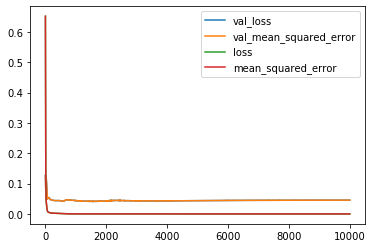

In [39]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()


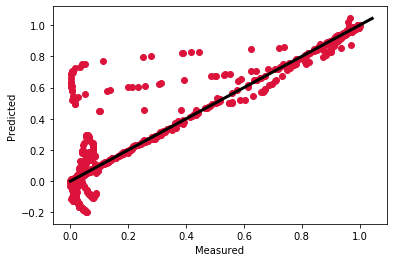

In [40]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


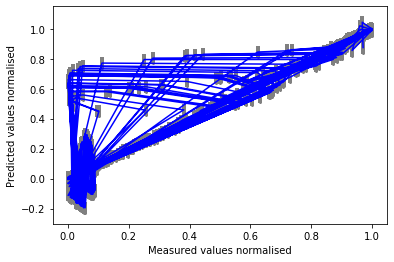

In [41]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [42]:
df_toadd = df_nrm[[ 'entropy', 'availability', 'flowLoad']]

In [43]:
df_toadd_short_train = m[:y_train.shape[0]]

In [44]:
df_toadd_short_test = m[:y_test.shape[0]]

In [45]:
yhat_copy = yhat.copy()
yhat_copy_df = pd.DataFrame(yhat_copy)
yhat_copy_new_df = pd.concat([df_toadd_short_test, yhat_copy_df], axis =1)




In [46]:
y_test_copy = y_test.copy()
y_test_copy_df = pd.DataFrame(y_test_copy)
#y_test_copy_df.insert(loc=10, column='flowHP', value=df_nrm_flowHP_short )
ytest_copy_new_df = pd.concat([df_toadd_short_test, y_test_copy_df], axis =1)

In [47]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat_copy_new_df, scaler), unscale(ytest_copy_new_df, scaler)



In [48]:
y_pred_unscaled_df = pd.DataFrame(y_pred_unscaled)
#y_pred_unscaled_df
y_pred_unscaled_df =y_pred_unscaled_df.iloc[:,3:]
y_pred_unscaled_df

column_name  = [i  for i in range(0, y_pred_unscaled_df.shape[1])]
y_pred_unscaled_df.columns  = column_name
y_pred_unscaled_df

,0,1,2,3,4,5,6,7,8,9
0,35.526231,52.166971,51.379134,52.033682,52.373889,52.432019,52.182240,52.283312,52.330214,52.411922
1,35.206571,51.465624,51.267988,52.045377,52.109452,52.095677,52.315203,52.377574,52.323460,52.412143
2,34.955679,50.773261,51.078095,51.962918,52.103199,52.415213,52.421819,52.350913,52.403341,52.465461
3,32.806334,45.928911,50.106905,51.737221,52.265106,52.261037,52.310133,52.522131,52.539782,52.492616
4,32.003437,44.076837,50.210456,51.633306,52.286896,52.394550,52.382063,52.596699,52.690607,52.507291
...,...,...,...,...,...,...,...,...,...,...
120,22.035393,18.573199,27.391446,27.505471,26.817793,17.375534,23.157223,40.713495,41.201668,48.712442
121,22.109721,18.633855,26.271095,27.309379,27.001067,17.492452,23.884266,39.830079,40.606420,48.570520
122,22.265347,18.983151,24.892464,26.895658,26.641182,17.150985,24.043828,39.009025,40.088198,48.551938
123,22.416865,19.303384,23.592983,26.743020,26.293031,17.119645,24.158026,38.261197,39.582546,48.503216


In [49]:
y_test_unscaled_df = pd.DataFrame(y_test_unscaled)
y_test_unscaled_df

y_test_unscaled_df =y_test_unscaled_df.loc[:, 3:]
y_test_unscaled_df
column_name  = [i for i in range(0, y_test_unscaled_df.shape[1])]
y_test_unscaled_df.columns  = column_name
y_test_unscaled_df

,0,1,2,3,4,5,6,7,8,9
0,37.0538,49.9449,51.3084,51.9221,52.2972,52.4677,52.4336,52.5700,52.6724,52.5018
1,36.4768,49.7064,51.2061,52.0585,52.2631,52.4677,52.4677,52.5700,52.6383,52.5018
2,35.5265,49.8086,51.0356,51.9221,52.2631,52.4336,52.4336,52.6042,52.6724,52.5018
3,31.7961,48.0030,50.5925,51.8539,52.1949,52.4336,52.3995,52.5700,52.6383,52.4677
4,30.9827,45.8239,50.4561,51.7516,52.1949,52.3654,52.3654,52.5359,52.6383,52.4677
...,...,...,...,...,...,...,...,...,...,...
120,22.1838,23.9755,24.0093,24.1784,24.1108,24.3813,24.1446,24.4152,28.7808,48.6842
121,22.2514,24.0770,24.1108,24.2122,24.1784,24.2122,24.3813,24.5843,26.6819,48.0030
122,22.2176,24.1784,24.1784,24.3137,24.2122,24.6181,24.3813,24.6857,26.0051,47.0835
123,22.2852,24.2461,24.2461,24.4828,24.3137,24.4828,24.5166,24.7196,25.5991,45.9600


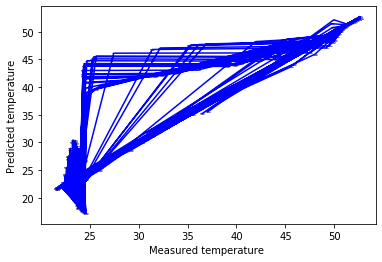

In [50]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(np.array(y_test_unscaled_df), np.array(y_pred_unscaled_df), yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=2);

ax.set_xlabel('Measured temperature ')
ax.set_ylabel('Predicted temperature')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

<Figure size 432x432 with 0 Axes>

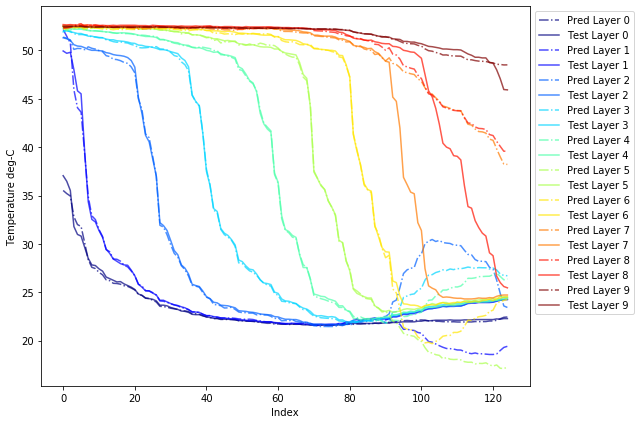

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43b855b910>)

In [51]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,:]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,:]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    #axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    #mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    #axins.set_xlim([60,85])
    #axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        

        """
        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
        """
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled_df, y_test_unscaled_df, alpha =0.7, scm=None)